Importing the necessary libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Loading the dataset

In [ ]:
dataset = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

Quick EDA 

In [ ]:
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_taxi_desc = dataset.describe(include='all')
display(data_taxi_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 5572

Display of dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



Basics statistics: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2



Percentage of missing values: 


v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

Dropping uninteresting columns

In [ ]:
dataset=dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [ ]:
dataset["v1"] = dataset["v1"].apply(lambda x: 1 if x == "ham"
                                                      else 0 if x == 'spam'
                                                      else x)

In [ ]:
sentences = dataset['v2'].tolist()
labels = dataset['v1'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

Tokenizing the dataset

In [ ]:
vocab_size = 600
embedding_dim = 16
max_length = 60
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

Reviewing a sequence

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

ok lar <OOV> wif u <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Ok lar... Joking wif u oni...


Training the model with embeddings

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 16)            9600      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 9,709
Trainable params: 9,709
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
140/140 [==============================] - 3s 8ms/step - loss: 0.5141 - accuracy: 0.8649 - val_loss: 0.3674 - val_accuracy: 0.8700
Epoch 2/30
140/140 [==============================] - 1s 6ms/step - loss: 0.3338 - accuracy: 0.8649 - val_loss: 0.2951 - val_accuracy: 0.8700
Epoch 3/30
140/140 [==============================] - 1s 7ms/step - loss: 0.2780 - accuracy: 0.8652 - val_loss: 0.2318 - val_accuracy: 0.8717
Epoch 4/30
140/140 [==============================] - 1s 7ms/step - loss: 0.2048 - accuracy: 0.9096 - val_loss: 0.1581 - val_accuracy: 0.9543
Epoch 5/30
140/140 [==============================] - 1s 6ms/step - loss: 0.1443 - accuracy: 0.9567 - val_loss: 0.1154 - val_accuracy: 0.9668
Epoch 6/30
140/140 [==============================] - 1s 7ms/step - loss: 0.1097 - accuracy: 0.9681 - val_loss: 0.0911 - val_accuracy: 0.9731
Epoch 7/30
140/140 [==============================] - 1s 9ms/step - loss: 0.0882 - accuracy: 0.9733 - val_loss: 0.0779 - val_accuracy: 0.9794
Epoch 

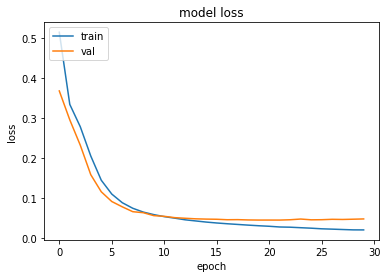

In [ ]:
num_epochs = 30
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(600, 16)


In [ ]:
# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

Detecting Spam Across New Messages

In [ ]:
# Use the model to predict whether a message is spam
text_messages = ['Greg, can you call me back once you get this?',
                'Congrats on your new iPhone! Click here to claim your prize...', 
                'Really like that new photo of you',
                'Did you hear the news today? Terrible what has happened...',
                'Attend this free COVID webinar today: Book your session now...',
                'Are you coming to the party tonight?',
                'Your parcel has gone missing',
                'Do not forget to bring friends!',
                'You have won a million dollars! Fill out your bank details here...',
                'Looking forward to seeing you again']

print(text_messages) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(text_messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more likely that the message is spam
for x in range(len(text_messages)):
  print(text_messages[x])
  print(classes[x])
  print('\n')

['Greg, can you call me back once you get this?', 'Congrats on your new iPhone! Click here to claim your prize...', 'Really like that new photo of you', 'Did you hear the news today? Terrible what has happened...', 'Attend this free COVID webinar today: Book your session now...', 'Are you coming to the party tonight?', 'Your parcel has gone missing', 'Do not forget to bring friends!', 'You have won a million dollars! Fill out your bank details here...', 'Looking forward to seeing you again']
1/1 [==============================] - 0s 109ms/step
Greg, can you call me back once you get this?
[0.9783273]


Congrats on your new iPhone! Click here to claim your prize...
[0.05184577]


Really like that new photo of you
[0.9932901]


Did you hear the news today? Terrible what has happened...
[0.99024445]


Attend this free COVID webinar today: Book your session now...
[0.6181397]


Are you coming to the party tonight?
[0.99725735]


Your parcel has gone missing
[0.9925135]


Do not forget to b